In [1]:
from __future__ import print_function

from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'
! mkdir $folder

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_miso_modalities', flotilla_dir=flotilla_dir)

mkdir: cannot create directory `figures': File exists
2016-12-09 13:26:45	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_miso_modalities/datapackage.json
2016-12-09 13:26:45	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2016-12-09 13:27:28 	Initializing Study
2016-12-09 13:27:28 	Initializing Predictor configuration manager for Study
2016-12-09 13:27:28	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-12-09 13:27:28	Added ExtraTreesClassifier to default predictors
2016-12-09 13:27:28	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-12-09 13:27:28	Added ExtraTreesRegressor to default predictors
2016-12-09 13:27:28	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-12-09 13:27:28	Added GradientBoostingClassifier to default predictors
2016-12-09 13:27:28	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2016-12-09 13:27:28	Added GradientBoostingRegressor to default predictors
2016-12-09 13:27:34 	Building Gene Ontology database...
2016-12-09 13:27:46 		Done
2016-

In [2]:
modalities_counts = study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).count().reset_index()
modalities_counts = modalities_counts.rename(columns={'event_id': '# AS events'})
modalities_counts.head()

,phenotype,modality,# AS events
0,MN,bimodal,1044
1,MN,excluded,2592
2,MN,included,2403
3,MN,middle,26
4,MN,uncategorized,2781


In [3]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

modalities_counts_2d = modalities_counts.pivot(index='phenotype', columns='modality', values='# AS events')
modalities_counts_2d = modalities_counts_2d.reindex(columns=MODALITY_ORDER, index=study.phenotype_order)
modalities_counts_2d = modalities_counts_2d.T
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,5125,3743,2592
bimodal,796,772,1044
included,5812,3872,2403
middle,108,54,26
uncategorized,5828,4703,2781


In [4]:
modalities_counts_2d = modalities_counts_2d.fillna(0)
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,5125,3743,2592
bimodal,796,772,1044
included,5812,3872,2403
middle,108,54,26
uncategorized,5828,4703,2781


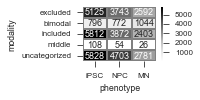

In [5]:
sns.set(style='ticks', context='paper')
fig, ax= plt.subplots(figsize=(2.75, 1.5))
mask = modalities_counts_2d.isnull()
sns.heatmap(modalities_counts_2d, annot=True, mask=mask, fmt='g', annot_kws=dict(size=9), 
            cmap='Greys', linewidth=1, linecolor='grey')
fig.tight_layout()
fig.savefig('{}/modalities_counts_heatmap.pdf'.format(folder))

### Plot modality percentage barplots

In [6]:
modalities_counts['percentage'] = 100*modalities_counts.groupby('phenotype')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts

,phenotype,modality,# AS events,percentage
0,MN,bimodal,1044,11.801944
1,MN,excluded,2592,29.301379
2,MN,included,2403,27.164820
3,MN,middle,26,0.293918
4,MN,uncategorized,2781,31.437938
5,NPC,bimodal,772,5.873402
6,NPC,excluded,3743,28.476872
7,NPC,included,3872,29.458308
8,NPC,middle,54,0.410834
9,NPC,uncategorized,4703,35.780584


In [7]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2894: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


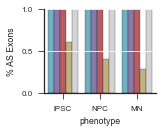

In [8]:

fig, ax = plt.subplots(figsize=(2, 1.5))

# ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order, zorder=-1)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
ax.set(ylabel='% AS Exons')
ax.grid(axis='y', color='white', zorder=100)
sns.despine()
fig.savefig('{}/modalities_barplot.pdf'.format(folder))

ax.set(ylim=(0, 1))
# ax.grid(axis='y', color='grey', zorder=np.inf)
fig.savefig('{}/modalities_barplot_zoom.pdf'.format(folder))

# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# sns.despine(ax=ax, bottom=True)
# ax.tick_params(axis='x', bottom='off')
# ax.set(xticks=[], xlabel='', ylim=(10, 65), ylabel='', yticks=[10, 35, 60])

# ax = axes[1]
# sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
#            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
# ax.set(ylim=(0, 0.5), ylabel='% AS Exons', 
#        xlabel='')
# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# sns.despine(ax=ax)
# # fig.tight_layout()
# fig.savefig('{}/modalities_barplot.pdf'.format(folder))

## Modality venn

In [9]:
import matplotlib_venn

sns.set(context='paper', style='ticks')

from anchor import MODALITY_ORDER

study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal          1044
           excluded         2592
           included         2403
           middle             26
           uncategorized    2781
NPC        bimodal           772
           excluded         3743
           included         3872
           middle             54
           uncategorized    4703
iPSC       bimodal           796
           excluded         5125
           included         5812
           middle            108
           uncategorized    5828
dtype: int64

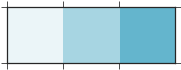

In [10]:
sns.palplot(sns.light_palette(MODALITY_PALETTE[0], n_colors=3))

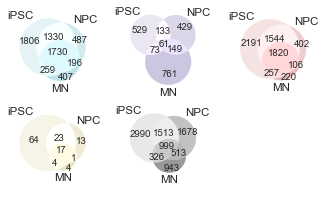

In [11]:
from anchor import MODALITY_TO_CMAP

fig, axes = plt.subplots(figsize=(4.5, 3), nrows=2, ncols=3)

axes_iter = axes.flat

grouped_modality = study.supplemental.modalities_tidy.groupby('modality')

for modality in MODALITY_ORDER:
    modality_df = grouped_modality.get_group(modality)
#     if modality == 'middle':
#         continue
    grouped_phenotype = modality_df.groupby('phenotype')
    sets = [set(grouped_phenotype.get_group(phenotype)['event_id']) for phenotype in study.phenotype_order]
    
    ax = axes_iter.next()
    cmap = MODALITY_TO_CMAP[modality]

    set_colors = cmap(np.linspace(0, 1, 4))[1:]

#     set_colors = sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)
#     set_colors = study.phenotype_color_ordered
    matplotlib_venn.venn3(sets, set_labels=study.phenotype_order, set_colors=set_colors, ax=ax)
ax = axes[-1][-1]
ax.axis('off')
#     ax.set(title=modality)
fig.tight_layout()
fig.savefig('{}/venn_diagrams.pdf'.format(folder))

In [12]:
same_in_all_three_modalities = study.supplemental.modalities_tidy.groupby(['modality', 'event_id']).filter(lambda x: len(x) == len(study.phenotype_order))
same_in_all_three_modalities

,event_id,phenotype,modality
45,chr10:102045854:102045970:-@chr10:102042663:10...,MN,excluded
46,chr10:102045854:102045970:-@chr10:102042663:10...,NPC,excluded
47,chr10:102045854:102045970:-@chr10:102042663:10...,iPSC,excluded
48,chr10:102286156:102286311:-@chr10:102283734:10...,MN,excluded
49,chr10:102286156:102286311:-@chr10:102283734:10...,NPC,excluded
50,chr10:102286156:102286311:-@chr10:102283734:10...,iPSC,excluded
51,chr10:102286732:102286831:-@chr10:102286156:10...,MN,included
52,chr10:102286732:102286831:-@chr10:102286156:10...,NPC,included
53,chr10:102286732:102286831:-@chr10:102286156:10...,iPSC,included
72,chr10:102747070:102747272:-@chr10:102746847:10...,MN,uncategorized


In [13]:
same_in_all_three_modalities.groupby('event_id')['modality']

In [14]:
same_in_all_three_modalities = same_in_all_three_modalities[['event_id', 'modality']].drop_duplicates()
same_in_all_three_modalities.head()

,event_id,modality
45,chr10:102045854:102045970:-@chr10:102042663:10...,excluded
48,chr10:102286156:102286311:-@chr10:102283734:10...,excluded
51,chr10:102286732:102286831:-@chr10:102286156:10...,included
72,chr10:102747070:102747272:-@chr10:102746847:10...,uncategorized
105,chr10:103360960:103361093:+@chr10:103368624:10...,excluded


In [15]:
same_in_all_three_modalities_splice_types = same_in_all_three_modalities.join(study.splicing.feature_data['splice_type'], on='event_id')
same_in_all_three_modalities_splice_types.head()

,event_id,modality,splice_type
45,chr10:102045854:102045970:-@chr10:102042663:10...,excluded,SE
48,chr10:102286156:102286311:-@chr10:102283734:10...,excluded,SE
51,chr10:102286732:102286831:-@chr10:102286156:10...,included,SE
72,chr10:102747070:102747272:-@chr10:102746847:10...,uncategorized,MXE
105,chr10:103360960:103361093:+@chr10:103368624:10...,excluded,SE


In [16]:
s = study.splicing.feature_data['splice_type']
all_events = s.groupby(s).size()
all_events.name = 'all'
all_events

splice_type
MXE     5976
SE     31988
Name: all, dtype: int64

In [17]:
splice_type_modalities = same_in_all_three_modalities_splice_types.groupby(['modality', 'splice_type']).size().unstack()
splice_type_modalities = splice_type_modalities.append(all_events)
splice_type_modalities

splice_type,MXE,SE
modality,,
bimodal,7,54
excluded,210,1520
included,164,1656
middle,15,2
uncategorized,342,657
all,5976,31988


In [18]:
tidy = splice_type_modalities.unstack().reset_index()
tidy = tidy.rename(columns={0: 'n_events'})
tidy

,splice_type,modality,n_events
0,MXE,bimodal,7
1,MXE,excluded,210
2,MXE,included,164
3,MXE,middle,15
4,MXE,uncategorized,342
5,MXE,all,5976
6,SE,bimodal,54
7,SE,excluded,1520
8,SE,included,1656
9,SE,middle,2


In [19]:
tidy['percentage_of_modality'] = tidy.groupby('modality')['n_events'].apply(lambda x: 100 * x/x.sum())
tidy

,splice_type,modality,n_events,percentage_of_modality
0,MXE,bimodal,7,11.475410
1,MXE,excluded,210,12.138728
2,MXE,included,164,9.010989
3,MXE,middle,15,88.235294
4,MXE,uncategorized,342,34.234234
5,MXE,all,5976,15.741229
6,SE,bimodal,54,88.524590
7,SE,excluded,1520,87.861272
8,SE,included,1656,90.989011
9,SE,middle,2,11.764706


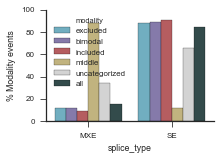

In [20]:
import anchor

hue_order = anchor.MODALITY_ORDER + ['all']
palette = anchor.MODALITY_PALETTE + ['DarkSlateGray']

fig, ax = plt.subplots(figsize=(3, 2))
sns.barplot(x='splice_type', y='percentage_of_modality', hue='modality', data=tidy, 
            hue_order=hue_order, palette=palette)
ax.set(ylabel='% Modality events')
sns.despine()
fig.savefig('{}/percent_modality_in_splice_types.pdf'.format(folder))

## Lavalamps

In [21]:
from __future__ import print_function

In [22]:
study.metadata.data.head()

,single,pooled,phenotype,neuron,progenitor,stressed,craig_venter,differentiation_batch,split,outlier
CVN_01,True,False,NPC,False,True,False,True,NaN,NaN,False
CVN_02,True,False,NPC,False,True,False,True,NaN,NaN,False
CVN_03,True,False,NPC,False,True,False,True,NaN,NaN,False
CVN_04,True,False,NPC,False,True,False,True,NaN,NaN,False
CVN_05,True,False,NPC,False,True,False,True,NaN,NaN,False


In [23]:
from flotilla.visualize.splicing import lavalamp

In [24]:
lavalamp??

In [26]:
figure_folder = 'figures/004_modality_global_stats'

In [27]:
lavalamp_folder = '{}/lavalamps'.format(figure_folder)
! mkdir -p $lavalamp_folder

In [ ]:
for (phenotype, modality), df in study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']):
    if modality in ('included', 'excluded'):
        continue
    print(phenotype, modality)
    samples = study.metadata.data.query('(phenotype == @phenotype) & (single == True) & (outlier == False)').index
    print('\t', len(samples))
    psi = study.splicing.data.loc[samples, df['event_id']].dropna(thresh=10, axis=1)
    print('\t\t', psi.shape)
    fig, ax = plt.subplots(figsize=(6, 2))
    lavalamp(psi, ax=ax, color=MODALITY_TO_COLOR[modality], marker=study.phenotype_to_marker[phenotype], 
             title='{} {}'.format(phenotype, modality), markersize=3)
    fig.savefig('{}/{}_{}.pdf'.format(lavalamp_folder, phenotype, modality))

## Look at events that are the same in all three cell types

In [73]:
same_in_all_three_modalities_events = same_in_all_three_modalities.groupby('event_id')['modality']
same_in_all_three_modalities_events[:10]

NotImplementedError: Not implemented: slice(None, 10, None)

In [83]:
figure_folder = '{}/same_in_all_phenotypes'.format(folder)

In [84]:
middle_folder = '{}/middle'.format(figure_folder)

In [85]:
mkdir -p $middle_folder

In [86]:
middle_events = same_in_all_three_modalities.query('modality == "middle"')['event_id']
# middle_events[:10]

# len(middle_events)

for event in middle_events:
    gene_name = study.splicing.feature_data['gene_name'][event]
    study.plot_event(event)
    fig = plt.gcf()
    fig.savefig('{}/{}_{}.pdf'.format(middle_folder, gene_name, event))
plt.close('all')

In [87]:
uncategorized_folder = '{}/uncategorized'.format(figure_folder)

In [91]:
mkdir -p $uncategorized_folder

In [92]:
uncategorized_events = same_in_all_three_modalities.query('modality == "uncategorized"')['event_id']
# middle_events[:10]

# len(middle_events)

for event in uncategorized_events:
    gene_name = study.splicing.feature_data['gene_name'][event]
    study.plot_event(event)
    fig = plt.gcf()
    fig.savefig('{}/{}_{}.pdf'.format(uncategorized_folder, gene_name, event))
plt.close('all')